### TFBS Classification - ResNET

Papers : https://arxiv.org/abs/1512.03385 (architecture), https://arxiv.org/abs/1605.01133 (data)

In [9]:
import os
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.layers.merge import add
from keras import optimizers
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.load('X_TFBS.npy')
y = np.load('Y_TFBS.npy')
Y = np_utils.to_categorical(y)

In [3]:
print X.shape, Y.shape

(17052, 101, 4) (17052, 2)


In [4]:
inp = Input(shape=(101,1,4))

x1 = Convolution2D( 128,(5,1))(inp)

r1_a1 = Activation('relu')(x1)
r1_w1 = Convolution2D(128,( 5,1),padding='same')(r1_a1)
r1_a2 = Activation('relu')(r1_w1)
r1_d1 = Dropout(0.2)(r1_a2)
r1_w2 = Convolution2D(128,( 5,1),padding='same')(r1_d1)
x2 = add([x1, r1_w2])

r2_a1 = Activation('relu')(x2)
r2_w1 = Convolution2D(128,( 5,1),padding='same')(r2_a1)
r2_a2 = Activation('relu')(r2_w1)
r2_d1 = Dropout(0.2)(r2_a2)
r2_w2 = Convolution2D(128,( 5,1),padding='same')(r2_d1)
x3 = add([x2, r2_w2])

acti = Activation('relu')(x3)
av_pool = AveragePooling2D((97,1))((acti))
f1 = Flatten()(av_pool)
fc1 = Dense(32)(f1)
a1 = Activation('relu')(fc1)
fc2 = Dense(2)(a1)
a2 = Activation('softmax')(fc2)

model = Model(outputs=a2, inputs=inp)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 101, 1, 4)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 97, 1, 128)    2688        input_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 97, 1, 128)    0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 97, 1, 128)    82048       activation_1[0][0]               
___________________________________________________________________________________________

In [5]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0003)        
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [6]:
X = X.reshape(X.shape[0], 101, 1, 4)
hist = model.fit(X, Y,epochs = 20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 13641 samples, validate on 3411 samples
Epoch 1/20
13641/13641 [==============================] - 38s - loss: 0.6937 - acc: 0.5125 - val_loss: 0.6927 - val_acc: 0.5899
Epoch 2/20
13641/13641 [==============================] - 28s - loss: 0.6887 - acc: 0.5280 - val_loss: 0.6963 - val_acc: 0.5186
Epoch 3/20
13641/13641 [==============================] - 25s - loss: 0.6444 - acc: 0.6295 - val_loss: 0.6139 - val_acc: 0.6711
Epoch 4/20
13641/13641 [==============================] - 25s - loss: 0.6025 - acc: 0.6782 - val_loss: 0.5978 - val_acc: 0.6804
Epoch 5/20
13641/13641 [==============================] - 26s - loss: 0.5635 - acc: 0.7107 - val_loss: 0.5867 - val_acc: 0.6825
Epoch 6/20
13641/13641 [==============================] - 25s - loss: 0.5247 - acc: 0.7387 - val_loss: 0.5277 - val_acc: 0.7514
Epoch 7/20
13641/13641 [==============================] - 25s - loss: 0.5001 - acc: 0.7547 - val_loss: 0.5067 - val_acc: 0.7587
Epoch 8/20
13641/13641 [==============================]

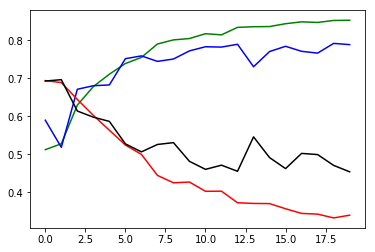

In [10]:
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')